# Решение уравнения переноса
## Дифференциальная задача
$$\begin{cases}
    u_t + e^{-x}u_x = \sin(\omega t),\\
    u(x, 0) = 1-e^{-x},\\
    u(0, t) = t.\\
    x \in [0, 1], t \in [0, 1]
\end{cases}$$

## Разностная задача
$$
\frac{u^{k+1}_n - u^{k}_n}{\tau} + e^{-hn}\frac{u^k_n-u^k_{n-1}}{n} = \sin(\omega k\tau ),
$$

$$
u^0_n = 1-e^{-nh}, n = 1..N
$$

$$
u^k_0 = k\tau, k = 0..K-1
$$

0.001 0.001


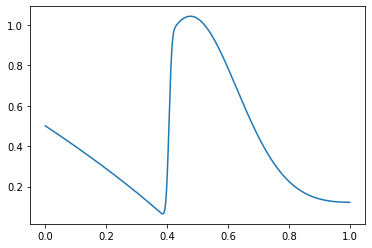

In [97]:
from matplotlib import pyplot as plt
import numpy as np
import scipy as sp

def ux0(x):
    return np.exp(-(x-0.1)**2/0.1)#1 - np.exp(-x)

def u0t(t):
    return t

def f(x, t):
    omega = 1
    return np.sin(omega*t)*x

def c(x, t):
    return np.exp(-x)

def solve_explicit(N, K):
    tau = 1/N; h = 1/K;
    print(tau, h)
    U = np.zeros((K, N))
    X = np.linspace(0, 1, N)
    T = np.linspace(0, 1, K)
    #print(U[0, :])
    U[0, :] = ux0(X)
    U[:, 0] = u0t(T)
    #print(U)
    for k in range(0, K-1):
        #print(f(X[1:], tau*(k)))
        U[k+1, 1:] = (f(X[1:], tau*(k)) - c(X[1:], tau*(k))*(U[k, 1:] - U[k, :-1])/h)*tau + U[k, 1:]    
    return (X, T, U)
    
X, T, sol_exp = solve_explicit(1000, 1000)
plt.plot(X, sol_exp[500])